# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import html5lib
%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [6]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()


,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [9]:

sinasc_raw['faixa_latitude'] = pd.cut(sinasc_raw['munResLat'], bins = [-np.inf, -10.5, np.inf], labels=['Abaixo de -10.5', 'Acima de -10.5'])

sinasc_raw.groupby('faixa_latitude', observed=False).aggregate({'QTDFILMORT': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'], 'STCESPARTO': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']})

QTDFILMORT                                                  \
                       sum      mean  min   max median       std       var   
faixa_latitude                                                               
Abaixo de -10.5     3105.0  0.242521  0.0  28.0    0.0  0.599430  0.359317   
Acima de -10.5      3538.0  0.291770  0.0   9.0    0.0  0.627856  0.394204   

                STCESPARTO                                                 
                       sum      mean  min  max median       std       var  
faixa_latitude                                                             
Abaixo de -10.5    28063.0  2.180497  1.0  9.0    2.0  1.229374  1.511361  
Acima de -10.5     32282.0  2.407308  1.0  9.0    2.0  1.460579  2.133290

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [14]:
sinasc_raw['faixa_area'] = pd.cut(sinasc_raw['munResArea'], bins = [-np.inf, 3000, np.inf], labels=['Maior que 3000', 'Menor que 3000'])

sinasc_raw.groupby('faixa_area', observed=False).aggregate({'ESTCIVMAE': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'], 'KOTELCHUCK': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']})

ESTCIVMAE                                                 \
                     sum      mean  min  max median       std       var   
faixa_area                                                                
Maior que 3000   13340.0  2.578774  1.0  9.0    2.0  1.582431  2.504089   
Menor que 3000   54643.0  2.537169  1.0  9.0    2.0  1.691778  2.862114   

               KOTELCHUCK                                               
                      sum      mean min max median       std       var  
faixa_area                                                              
Maior que 3000      24494  4.693236   1   9    5.0  1.456135  2.120328  
Menor que 3000     109968  5.042553   1   9    5.0  2.182659  4.763998

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [17]:
#determinando as faixas de altitude como acima da mediana e abaixo da mediana
sinasc_raw['munResAlt'].median()

153.0

In [19]:
sinasc_raw['faixa_altitude'] = pd.cut(sinasc_raw['munResAlt'], bins = [-np.inf, 153, np.inf], labels=['Altitude acima de 153', 'Altitude abaixo de 153'])

sinasc_raw.groupby('faixa_altitude', observed=False).aggregate({'MESPRENAT': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'], 'SEMAGESTAC': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']})

MESPRENAT                                          \
                             sum       mean  min   max median        std   
faixa_altitude                                                             
Altitude acima de 153   139952.0  12.589008  1.0  99.0    2.0  29.504031   
Altitude abaixo de 153   56463.0   4.328657  1.0  99.0    2.0  13.375458   

                                   SEMAGESTAC                                \
                               var        sum       mean   min   max median   
faixa_altitude                                                                
Altitude acima de 153   870.487871   493526.0  38.568771  21.0  45.0   39.0   
Altitude abaixo de 153  178.902863   501090.0  38.566151  19.0  45.0   39.0   

                                            
                             std       var  
faixa_altitude                              
Altitude acima de 153   2.093561  4.383000  
Altitude abaixo de 153  1.938267  3.756881

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia


In [22]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}

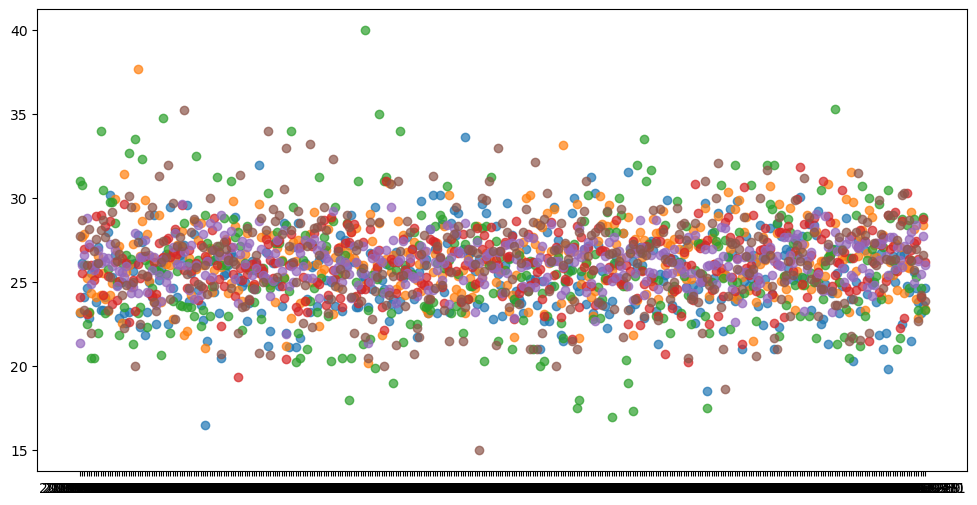

In [90]:
sinasc_raw['regiao_imediata'] = sinasc_raw['munResNome'].map(imediatas)


idade_media_por_regiao = sinasc_raw.groupby(['DTNASC', 'regiao_imediata'])['IDADEMAE'].mean().reset_index()

plt.figure(figsize=(12, 6))

for regiao in idade_media_por_regiao['regiao_imediata'].unique():
    dados_regiao = idade_media_por_regiao[idade_media_por_regiao['regiao_imediata'] == regiao]
    plt.scatter(
        dados_regiao['DTNASC'],
        dados_regiao['IDADEMAE'],
        label=regiao,
        alpha=0.7
    )

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [106]:
faixas_idh = {
    "Candeias do Jamari": "IDH-M médio",
    "Guajará-Mirim": "IDH-M médio",
    "Itapuã do Oeste": "IDH-M médio",
    "Nova Mamoré": "IDH-M baixo",
    "Porto Velho": "IDH-M alto",
    "Ariquemes": "IDH-M alto",
    "Alto Paraíso": "IDH-M médio",
    "Buritis": "IDH-M médio",
    "Cacaulândia": "IDH-M médio",
    "Campo Novo de Rondônia": "IDH-M baixo",
    "Cujubim": "IDH-M médio",
    "Monte Negro": "IDH-M médio",
    "Rio Crespo": "IDH-M médio",
    "Jaru": "IDH-M médio",
    "Governador Jorge Teixeira": "IDH-M baixo",
    "Machadinho D'Oeste": "IDH-M baixo",
    "Theobroma": "IDH-M baixo",
    "Vale do Anari": "IDH-M baixo",
    "Alvorada D'Oeste": "IDH-M médio",
    "Costa Marques": "IDH-M médio",
    "Ji-Paraná": "IDH-M alto",
    "Mirante da Serra": "IDH-M médio",
    "Nova União": "IDH-M baixo",
    "Ouro Preto do Oeste": "IDH-M médio",
    "Presidente Médici": "IDH-M médio",
    "São Francisco do Guaporé": "IDH-M médio",
    "São Miguel do Guaporé": "IDH-M médio",
    "Seringueiras": "IDH-M baixo",
    "Teixeirópolis": "IDH-M médio",
    "Urupá": "IDH-M médio",
    "Vale do Paraíso": "IDH-M médio",
    "Cacoal": "IDH-M alto",
    "Alta Floresta D'Oeste": "IDH-M médio",
    "Alto Alegre dos Parecis": "IDH-M baixo",
    "Castanheiras": "IDH-M médio",
    "Espigão D'Oeste": "IDH-M médio",
    "Ministro Andreazza": "IDH-M médio",
    "Nova Brasilândia D'Oeste": "IDH-M médio",
    "Novo Horizonte do Oeste": "IDH-M médio",
    "Parecis": "IDH-M médio",
    "Pimenta Bueno": "IDH-M alto",
    "Primavera de Rondônia": "IDH-M médio",
    "Rolim de Moura": "IDH-M alto",
    "Santa Luzia D'Oeste": "IDH-M médio",
    "São Felipe D'Oeste": "IDH-M médio",
    "Vilhena": "IDH-M alto",
    "Cabixi": "IDH-M médio",
    "Cerejeiras": "IDH-M médio",
    "Chupinguaia": "IDH-M médio",
    "Colorado do Oeste": "IDH-M médio",
    "Corumbiara": "IDH-M médio",
    "Pimenteiras do Oeste": "IDH-M médio"
}


In [108]:
sinasc_1 = sinasc_raw.set_index('munResNome')
sinasc_1.groupby(faixas_idh).count()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,munResTipo,munResUf,munResLat,munResLon,munResAlt,munResArea,faixa_latitude,faixa_area,faixa_altitude,regiao_imediata
munResNome,,,,,,,,,,,,,,,,,,,,,
IDH-M alto,16855,16799,16855,16855,16855,16646,16632,15110,15695,15428,...,16855,16855,16855,16855,16855,16855,16855,16855,16855,16855
IDH-M baixo,1826,1813,1826,1826,1826,1802,1807,1505,1734,1684,...,1826,1826,1826,1826,1826,1826,1826,1826,1826,1826
IDH-M médio,8346,8300,8346,8346,8346,8262,8276,7505,8025,7817,...,8346,8346,8346,8346,8346,8346,8346,8346,8346,8346


In [138]:
sinasc_1.groupby(faixas_idh)['ESCMAE'].value_counts()

munResNome   ESCMAE         
IDH-M alto   8 a 11 anos        9395
             12 anos ou mais    4119
             4 a 7 anos         2809
             1 a 3 anos          286
             Nenhuma              23
IDH-M baixo  8 a 11 anos        1112
             4 a 7 anos          421
             12 anos ou mais     222
             1 a 3 anos           49
             Nenhuma               3
IDH-M médio  8 a 11 anos        5125
             4 a 7 anos         1530
             12 anos ou mais    1426
             1 a 3 anos          181
             Nenhuma              14
Name: count, dtype: int64

In [142]:
sinasc_1.groupby(faixas_idh)['IDADEMAE'].mean()

munResNome
IDH-M alto     26.280332
IDH-M baixo    25.326944
IDH-M médio    25.884855
Name: IDADEMAE, dtype: float64

### 5.2 IFDM
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [116]:
faixas_ifdm = {
    "Alta Floresta D'Oeste": "Desenvolvimento moderado",
    "Alto Alegre dos Parecis": "Desenvolvimento regular",
    "Alto Paraíso": "Desenvolvimento regular",
    "Alvorada D'Oeste": "Desenvolvimento moderado",
    "Ariquemes": "Desenvolvimento moderado",
    "Buritis": "Desenvolvimento moderado",
    "Cabixi": "Desenvolvimento regular",
    "Cacaulândia": "Desenvolvimento regular",
    "Cacoal": "Desenvolvimento moderado",
    "Campo Novo de Rondônia": "Desenvolvimento regular",
    "Candeias do Jamari": "Desenvolvimento moderado",
    "Castanheiras": "Desenvolvimento regular",
    "Cerejeiras": "Desenvolvimento moderado",
    "Chupinguaia": "Desenvolvimento moderado",
    "Colorado do Oeste": "Desenvolvimento moderado",
    "Corumbiara": "Desenvolvimento regular",
    "Costa Marques": "Desenvolvimento regular",
    "Cujubim": "Desenvolvimento regular",
    "Espigão D'Oeste": "Desenvolvimento moderado",
    "Governador Jorge Teixeira": "Desenvolvimento regular",
    "Guajará-Mirim": "Desenvolvimento regular",
    "Itapuã do Oeste": "Desenvolvimento moderado",
    "Jaru": "Desenvolvimento moderado",
    "Ji-Paraná": "Desenvolvimento moderado",
    "Machadinho D'Oeste": "Desenvolvimento regular",
    "Ministro Andreazza": "Desenvolvimento regular",
    "Mirante da Serra": "Desenvolvimento regular",
    "Monte Negro": "Desenvolvimento moderado",
    "Nova Brasilândia D'Oeste": "Desenvolvimento regular",
    "Nova Mamoré": "Desenvolvimento regular",
    "Nova União": "Desenvolvimento regular",
    "Novo Horizonte do Oeste": "Desenvolvimento regular",
    "Ouro Preto do Oeste": "Desenvolvimento moderado",
    "Parecis": "Desenvolvimento regular",
    "Pimenta Bueno": "Desenvolvimento moderado",
    "Pimenteiras do Oeste": "Desenvolvimento moderado",
    "Porto Velho": "Desenvolvimento moderado",
    "Presidente Médici": "Desenvolvimento moderado",
    "Primavera de Rondônia": "Desenvolvimento moderado",
    "Rio Crespo": "Desenvolvimento moderado",
    "Rolim de Moura": "Desenvolvimento moderado",
    "Santa Luzia D'Oeste": "Desenvolvimento moderado",
    "São Felipe D'Oeste": "Desenvolvimento moderado",
    "São Francisco do Guaporé": "Desenvolvimento moderado",
    "São Miguel do Guaporé": "Desenvolvimento moderado",
    "Seringueiras": "Desenvolvimento moderado",
    "Teixeirópolis": "Desenvolvimento moderado",
    "Theobroma": "Desenvolvimento regular",
    "Urupá": "Desenvolvimento moderado",
    "Vale do Anari": "Desenvolvimento regular",
    "Vale do Paraíso": "Desenvolvimento regular",
    "Vilhena": "Desenvolvimento moderado"
}


In [134]:
sinasc_2 = sinasc_raw.set_index('munResNome')
sinasc_2.groupby(faixas_ifdm).count()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,munResTipo,munResUf,munResLat,munResLon,munResAlt,munResArea,faixa_latitude,faixa_area,faixa_altitude,regiao_imediata
munResNome,,,,,,,,,,,,,,,,,,,,,
Desenvolvimento moderado,22878,22801,22878,22878,22878,22613,22599,20499,21429,20968,...,22878,22878,22878,22878,22878,22878,22878,22878,22878,22878
Desenvolvimento regular,4149,4111,4149,4149,4149,4097,4116,3621,4025,3961,...,4149,4149,4149,4149,4149,4149,4149,4149,4149,4149


In [148]:
sinasc_2.groupby(faixas_ifdm)['ESCMAE'].value_counts()

munResNome                ESCMAE         
Desenvolvimento moderado  8 a 11 anos        13069
                          12 anos ou mais     5214
                          4 a 7 anos          3869
                          1 a 3 anos           415
                          Nenhuma               32
Desenvolvimento regular   8 a 11 anos         2563
                          4 a 7 anos           891
                          12 anos ou mais      553
                          1 a 3 anos           101
                          Nenhuma                8
Name: count, dtype: int64

In [150]:
sinasc_2.groupby(faixas_ifdm)['IDADEMAE'].mean()

munResNome
Desenvolvimento moderado    26.206137
Desenvolvimento regular     25.474331
Name: IDADEMAE, dtype: float64

### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [120]:
faixas_pib = {
    "Alta Floresta D'Oeste": "Acima de 300 Milhões",
    "Alto Alegre dos Parecis": "Acima de 200 Milhões",
    "Alto Paraíso": "Acima de 300 Milhões",
    "Alvorada D'Oeste": "Até 100 Milhões",
    "Ariquemes": "Acima de 1 Bilhão",
    "Buritis": "Acima de 300 Milhões",
    "Cabixi": "Até 100 Milhões",
    "Cacaulândia": "Até 100 Milhões",
    "Cacoal": "Acima de 1 Bilhão",
    "Campo Novo de Rondônia": "Acima de 200 Milhões",
    "Candeias do Jamari": "Acima de 100 Milhões",
    "Castanheiras": "Até 100 Milhões",
    "Cerejeiras": "Acima de 300 Milhões",
    "Chupinguaia": "Até 100 Milhões",
    "Colorado do Oeste": "Acima de 300 Milhões",
    "Corumbiara": "Acima de 200 Milhões",
    "Costa Marques": "Até 100 Milhões",
    "Cujubim": "Acima de 200 Milhões",
    "Espigão D'Oeste": "Acima de 500 Milhões",
    "Governador Jorge Teixeira": "Até 100 Milhões",
    "Guajará-Mirim": "Acima de 500 Milhões",
    "Itapuã do Oeste": "Acima de 200 Milhões",
    "Jaru": "Acima de 500 Milhões",
    "Ji-Paraná": "Acima de 1 Bilhão",
    "Machadinho D'Oeste": "Acima de 300 Milhões",
    "Ministro Andreazza": "Acima de 100 Milhões",
    "Mirante da Serra": "Acima de 100 Milhões",
    "Monte Negro": "Acima de 200 Milhões",
    "Nova Brasilândia D'Oeste": "Acima de 300 Milhões",
    "Nova Mamoré": "Acima de 300 Milhões",
    "Nova União": "Até 100 Milhões",
    "Novo Horizonte do Oeste": "Até 100 Milhões",
    "Ouro Preto do Oeste": "Acima de 300 Milhões",
    "Parecis": "Até 100 Milhões",
    "Pimenta Bueno": "Acima de 1 Bilhão",
    "Pimenteiras do Oeste": "Até 100 Milhões",
    "Porto Velho": "Acima de 1 Bilhão",
    "Presidente Médici": "Acima de 300 Milhões",
    "Primavera de Rondônia": "Até 100 Milhões",
    "Rio Crespo": "Até 100 Milhões",
    "Rolim de Moura": "Acima de 1 Bilhão",
    "Santa Luzia D'Oeste": "Acima de 100 Milhões",
    "São Felipe D'Oeste": "Até 100 Milhões",
    "São Francisco do Guaporé": "Acima de 300 Milhões",
    "São Miguel do Guaporé": "Acima de 500 Milhões",
    "Seringueiras": "Até 100 Milhões",
    "Teixeirópolis": "Até 100 Milhões",
    "Theobroma": "Até 100 Milhões",
    "Urupá": "Até 100 Milhões",
    "Vale do Anari": "Até 100 Milhões",
    "Vale do Paraíso": "Até 100 Milhões",
    "Vilhena": "Acima de 1 Bilhão"
}

In [130]:
sinasc_3 = sinasc_raw.set_index('munResNome')
sinasc_3.groupby(faixas_pib).count()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,munResTipo,munResUf,munResLat,munResLon,munResAlt,munResArea,faixa_latitude,faixa_area,faixa_altitude,regiao_imediata
munResNome,,,,,,,,,,,,,,,,,,,,,
Acima de 1 Bilhão,16855,16799,16855,16855,16855,16646,16632,15110,15695,15428,...,16855,16855,16855,16855,16855,16855,16855,16855,16855,16855
Acima de 100 Milhões,684,679,684,684,684,678,678,624,648,643,...,684,684,684,684,684,684,684,684,684,684
Acima de 200 Milhões,960,954,960,960,960,944,940,908,904,872,...,960,960,960,960,960,960,960,960,960,960
Acima de 300 Milhões,4058,4039,4058,4058,4058,4019,4026,3449,3792,3580,...,4058,4058,4058,4058,4058,4058,4058,4058,4058,4058
Acima de 500 Milhões,2465,2444,2465,2465,2465,2452,2454,2295,2438,2432,...,2465,2465,2465,2465,2465,2465,2465,2465,2465,2465
Até 100 Milhões,2005,1997,2005,2005,2005,1971,1985,1734,1977,1974,...,2005,2005,2005,2005,2005,2005,2005,2005,2005,2005


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

Nos municipios com o idh maior, a escolaridade das mulheres que daram luz é maior, tendo mais anos de estudo. assim como a media da idade delas.